In [67]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [2]:
#DATADIR = "D:/Data/BME/felev_5/temalab_tanulas/datasets/Lego_models"
#CATEGORIES = ['phase_1','phase_2','phase_3','phase_4','phase_5', 'phase_6', 'phase_6+errors']

DATADIR = "D:/Data/BME/felev_5/temalab_tanulas/datasets/error_detection"
CATEGORIES = ['1','2','3']

IMG_SIZE = 100
training_data = []

def create_training_data():
    errorcounter = 0
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)+1
        num_of_pics_each = 0
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) #maradjon színes, de sajnos red-blue cserélődik
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
                num_of_pics_each+=1
            except Exception as e:
                errorcounter+=1   #megnéztük, hogy volt-e error
        print(f"In [[{category}]] found {num_of_pics_each} pics") 
    print(f"Errors: {errorcounter}")
            
create_training_data()

In [[1]] found 598 pics
In [[2]] found 579 pics
In [[3]] found 585 pics
Errors: 0


In [55]:
random.shuffle(training_data)

target = [] 
data = [] #---->array

for features, label in training_data:
    data.append(features.flatten())  #a flatten miatt lesz a data egy dimenziós, amit a printnél láthatunk is
    target.append(label)
    


In [56]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

1585
1585
177
177


In [57]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [58]:
model.score(X_test, Y_test)

0.8587570621468926

Text(69.0, 0.5, 'Truth')

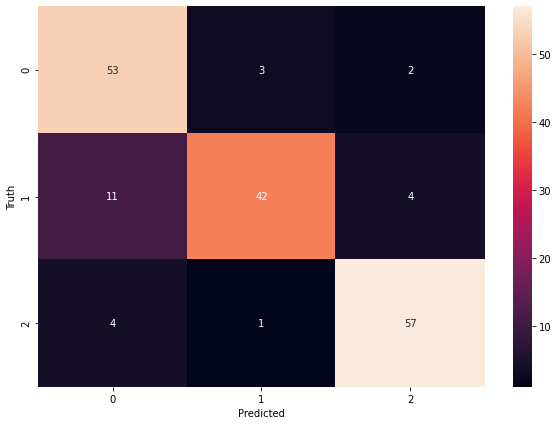

In [59]:
Y_predicted = model.predict(X_test)
cm = confusion_matrix(Y_test,Y_predicted)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

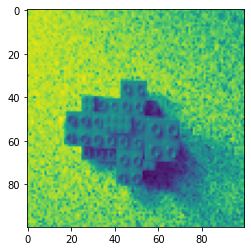

Predicted phase_2 but truth is phase_1
______________________________________________


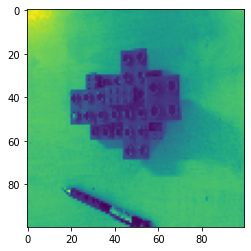

Predicted phase_3 but truth is phase_2
______________________________________________


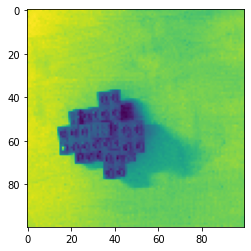

Predicted phase_1 but truth is phase_2
______________________________________________


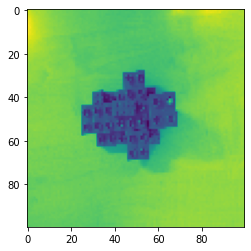

Predicted phase_2 but truth is phase_3
______________________________________________


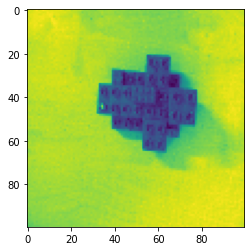

Predicted phase_1 but truth is phase_2
______________________________________________


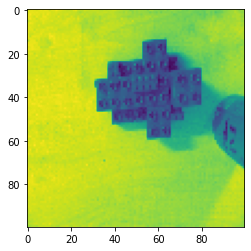

Predicted phase_2 but truth is phase_1
______________________________________________


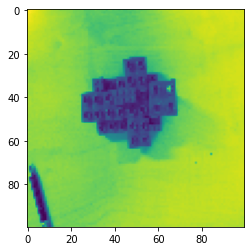

Predicted phase_1 but truth is phase_3
______________________________________________


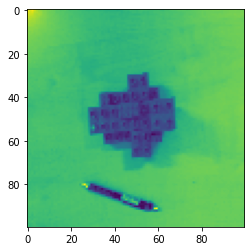

Predicted phase_1 but truth is phase_2
______________________________________________


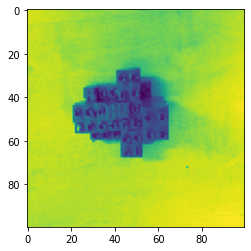

Predicted phase_1 but truth is phase_2
______________________________________________


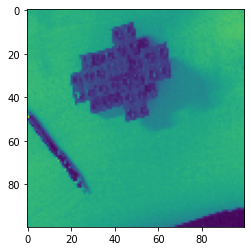

Predicted phase_1 but truth is phase_2
______________________________________________


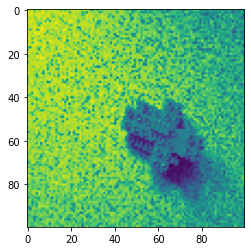

Predicted phase_3 but truth is phase_1
______________________________________________


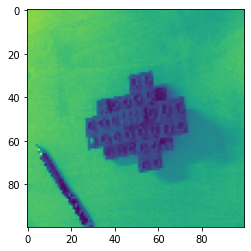

Predicted phase_1 but truth is phase_2
______________________________________________


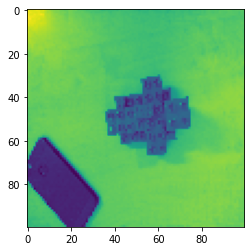

Predicted phase_1 but truth is phase_2
______________________________________________


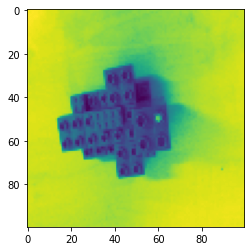

Predicted phase_1 but truth is phase_3
______________________________________________


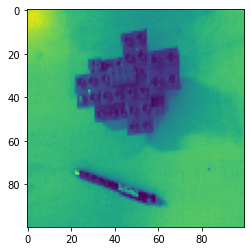

Predicted phase_3 but truth is phase_2
______________________________________________


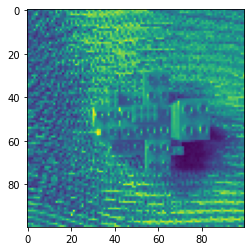

In [ ]:
def formatter(var):
    if var != 7:
        return var
    else:
        return """ERROR(phase_7)""" #legosnál a kis airsoftgolyó esetén kéne ERROR legyen
    
i = 0
for item in range(len(X_test)):
    pred = model.predict([X_test[item]])
    if pred != Y_test[item]:
        i += 1
        plt.imshow(X_test[item].reshape(IMG_SIZE, IMG_SIZE))
        plt.show()
        print(f"Predicted phase_{formatter(pred[0])} but truth is phase_{formatter(Y_test[item])}")
        print("______________________________________________")
print(f"total mismatches: {i}")
        